# Statistical Analysis and Visualisation with Python

### Project Objective:
Generate a synthetic dataset, perform descriptive and inferential statistics, and visualise the result using **matploblib** and **seaborn**.

In [ ]:
'''
    Import libraries:

'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# t-test
from scipy.stats import ttest_ind

## Task 1: Data Generation
Library used:

    -  np.random.normal( )
        - Gaussian Distribution (normal)
    - np.random.choice( )
        - get the random sample of 1D array
        - return numpy array

In [ ]:
# generate the dataset
sample = 1000

'''
    Syntax:
        np.random.normal(loc, scale, size):
            loc: mean,
            scale: std (how flat),
            size: sample size (return array shape)

'''

age = np.random.normal(loc=35, scale=10, size=sample)
height = np.random.normal(loc=170, scale=15, size=sample)
weight = np.random.normal(loc=70, scale=10, size=sample)

'''
    Syntax:
        np.random.choice(a, size, replace, p):
            a: 1D array sample,
            size: output shape,
            replace: boolean,
            p: probability in "a"

'''

gender = np.random.choice(a=['Male', 'Female'], size=sample, p=[0.5, 0.5])
income = np.random.normal(loc=50000, scale=15000, size=sample)

dataset = pd.DataFrame(data={
    "Age": age,
    "Height": height,
    "Weight": weight,
    "Gender": gender,
    "Income": income
})



## Task 2: Descriptive Statistics
#### Objective A: Calculate basic descriptive statistics

     Description: to apply a function or a list of funtion names to use along the axis of the dataframe
    

In [ ]:
'''
    Calculate mean, median, standard deviation, and variance for
    age, height, weight, and income.

    Syntax:
        pd.DataFrame(data).agg(func, axis=0, args, kwargs)
            func: function name,
            axis: index (0), columns (1)

'''

stats = dataset[['Age', 'Height', 'Weight', 'Income']].agg(['mean', 'median', 'std', 'var'])
stats

,Age,Height,Weight,Income
mean,34.841145,168.562851,69.718506,5.005128e+04
median,34.867009,168.419042,69.639241,5.021401e+04
std,10.338989,14.756099,9.597520,1.454019e+04
var,106.894689,217.742450,92.112388,2.114170e+08


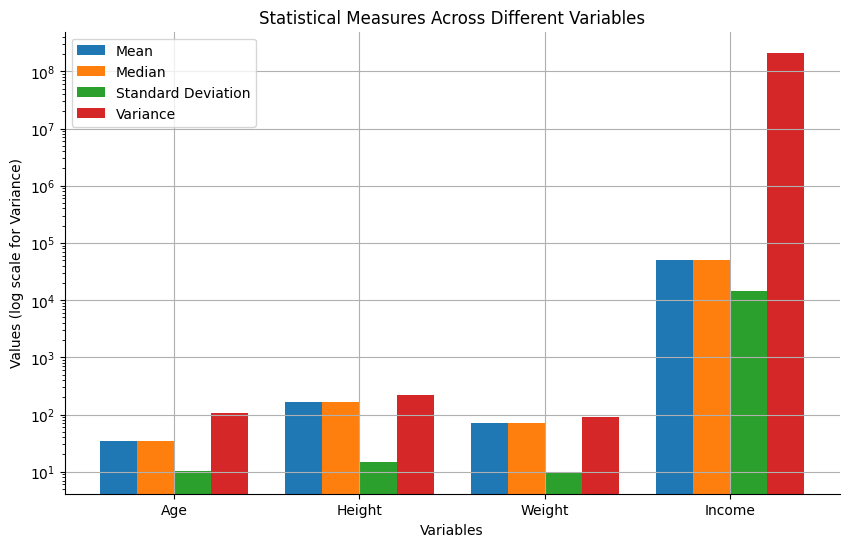

In [ ]:
# @title [Extra] Bar Chart: Age, Height, Weight, and Income

'''
    Plot bar charts for statistical measures: mean, median, standard deviation, variance.
    Bars grouped by variable, with variance on a logarithmic scale.

    Syntax:
        plt.figure(figsize=(10, 6))
        plt.bar for plotting with adjusted widths and grouped bars
        plt.title, plt.xlabel, plt.ylabel for labeling
        plt.xticks to align category names with bars
        plt.legend to show labels
        plt.grid for grid lines
        log=True for logarithmic scale on variance

'''

# figure size
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(stats.columns))


plt.bar(index, stats.loc['mean'], width=bar_width, label='Mean')
plt.bar(index + bar_width, stats.loc['median'], width=bar_width, label='Median')
plt.bar(index + 2 * bar_width, stats.loc['std'], width=bar_width, label='Standard Deviation')
plt.bar(index + 3 * bar_width, stats.loc['var'], width=bar_width, label='Variance', log=True)

# Formatting the plot
plt.title('Statistical Measures Across Different Variables')
plt.xlabel('Variables')
plt.ylabel('Values (log scale for Variance)')
plt.xticks(index + 1.5 * bar_width, stats.columns)
plt.legend()
plt.grid()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# show the plot
plt.show()

#### Objective B: Calculate the mode of gender

    Description: .mode() is designed to find the most common value

In [ ]:
'''
    Syntax:
        pd.DataFrame.mode(axis, numeric_only, dropna, kwargs):
            axis: index(0), columns(1),
            numeric_only: bool or None,
            dropna: bool

'''

gender_mode = dataset['Gender'].mode()
gender_mode

,Gender
0,Male


## Task 3: Data Visualisation
#### Objective A: Visualise the distributions


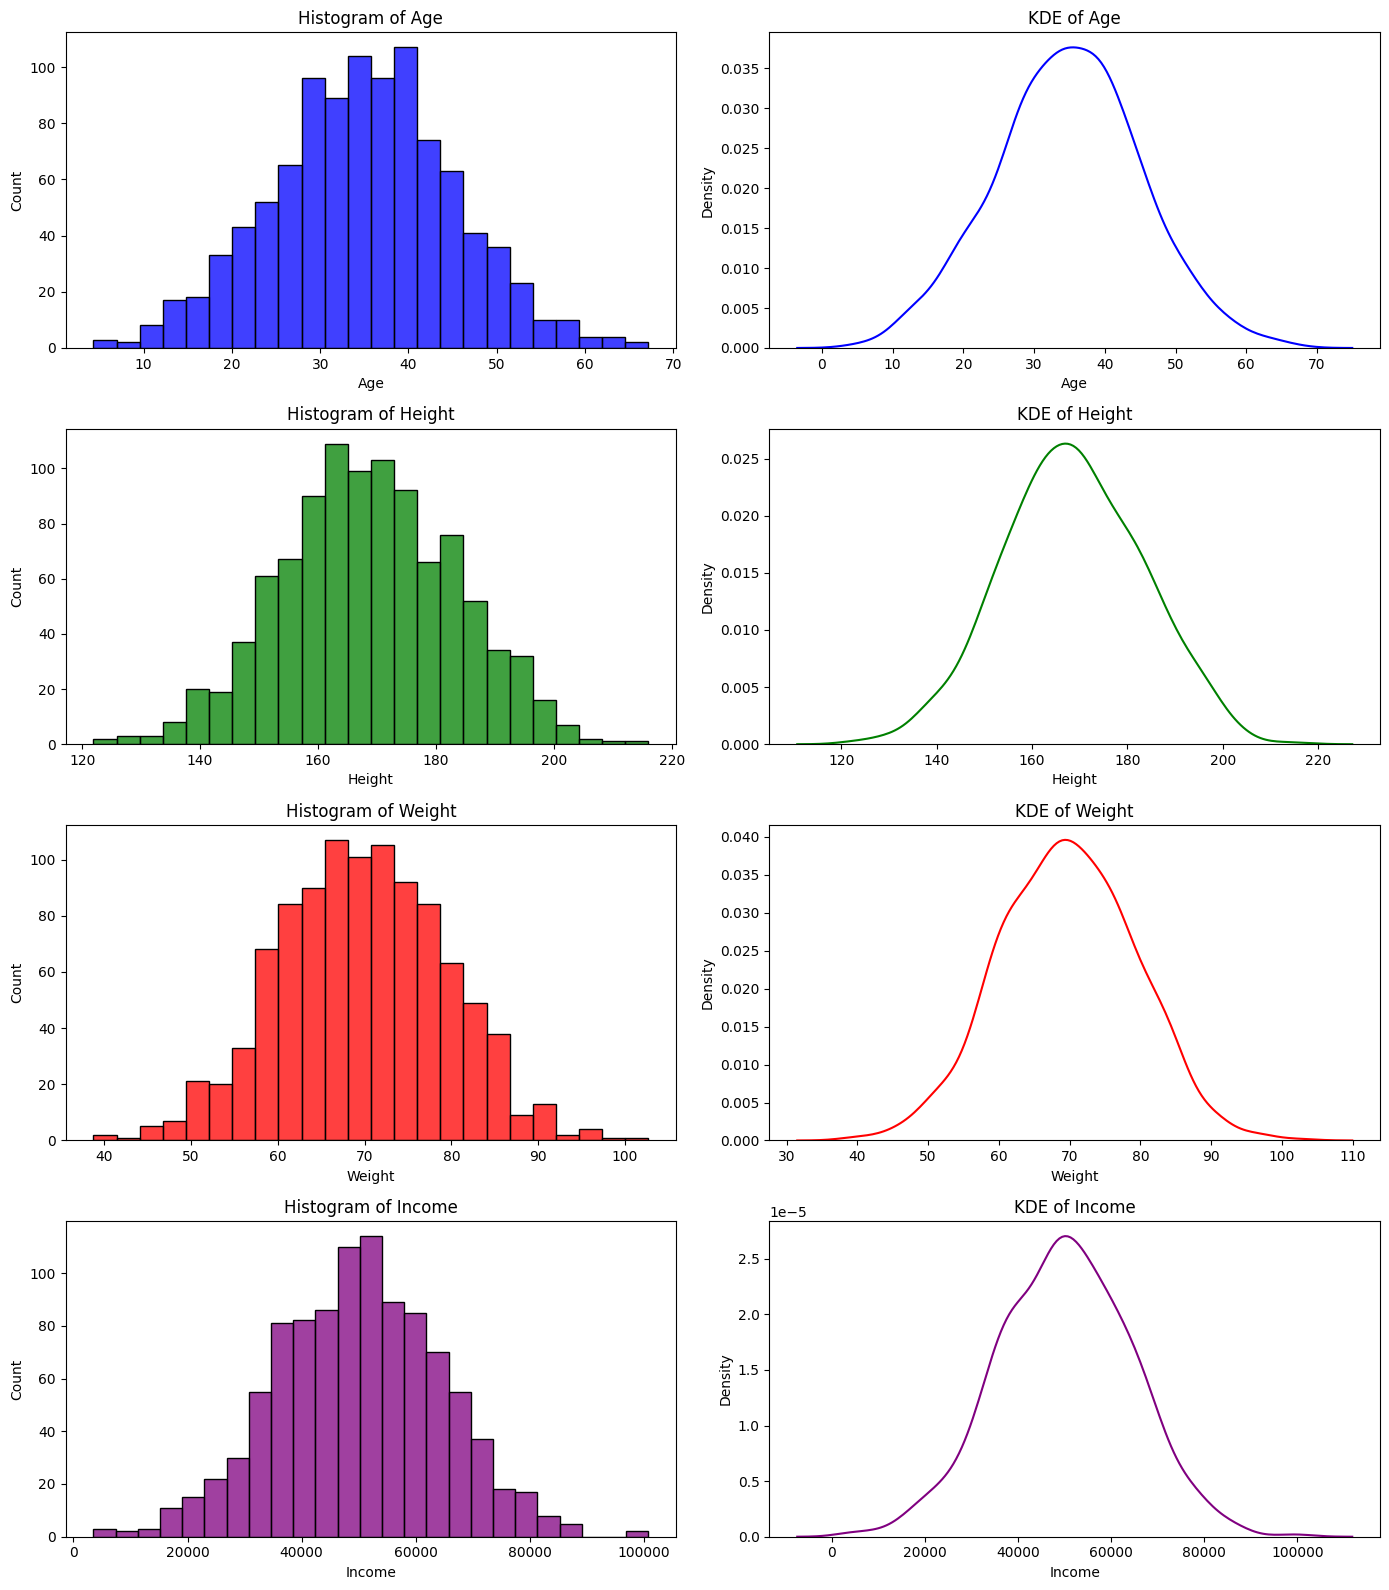

In [ ]:
'''
    Plot histograms and KDE plots: age, height, weight, income
    Seaborn creates histograms and KDE plots for:
    age, height, weight, income

    Syntax:
        fig, axs = plt.subplots(4, 2, figsize=(14, 16))
            - Set up the figure and axes for a 4x2 grid of plots
        sns.histplot and sns.kdeplot functions applied:
            - Histograms on column 0, KDE plots on column 1

'''

# set up the figure and axes for a 4x2 grid of plots for separate histograms and KDEs
fig, axs = plt.subplots(4, 2, figsize=(14, 16))

# histograms
sns.histplot(dataset['Age'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Histogram of Age')

sns.histplot(dataset['Height'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Histogram of Height')

sns.histplot(dataset['Weight'], ax=axs[2, 0], color='red')
axs[2, 0].set_title('Histogram of Weight')

sns.histplot(dataset['Income'], ax=axs[3, 0], color='purple')
axs[3, 0].set_title('Histogram of Income')

# KDE plots
sns.kdeplot(dataset['Age'], ax=axs[0, 1], color='blue')
axs[0, 1].set_title('KDE of Age')

sns.kdeplot(dataset['Height'], ax=axs[1, 1], color='green')
axs[1, 1].set_title('KDE of Height')

sns.kdeplot(dataset['Weight'], ax=axs[2, 1], color='red')
axs[2, 1].set_title('KDE of Weight')

sns.kdeplot(dataset['Income'], ax=axs[3, 1], color='purple')
axs[3, 1].set_title('KDE of Income')

# adjust layout
plt.tight_layout()
plt.show()


### Objective B: Boxplots to identify outliers


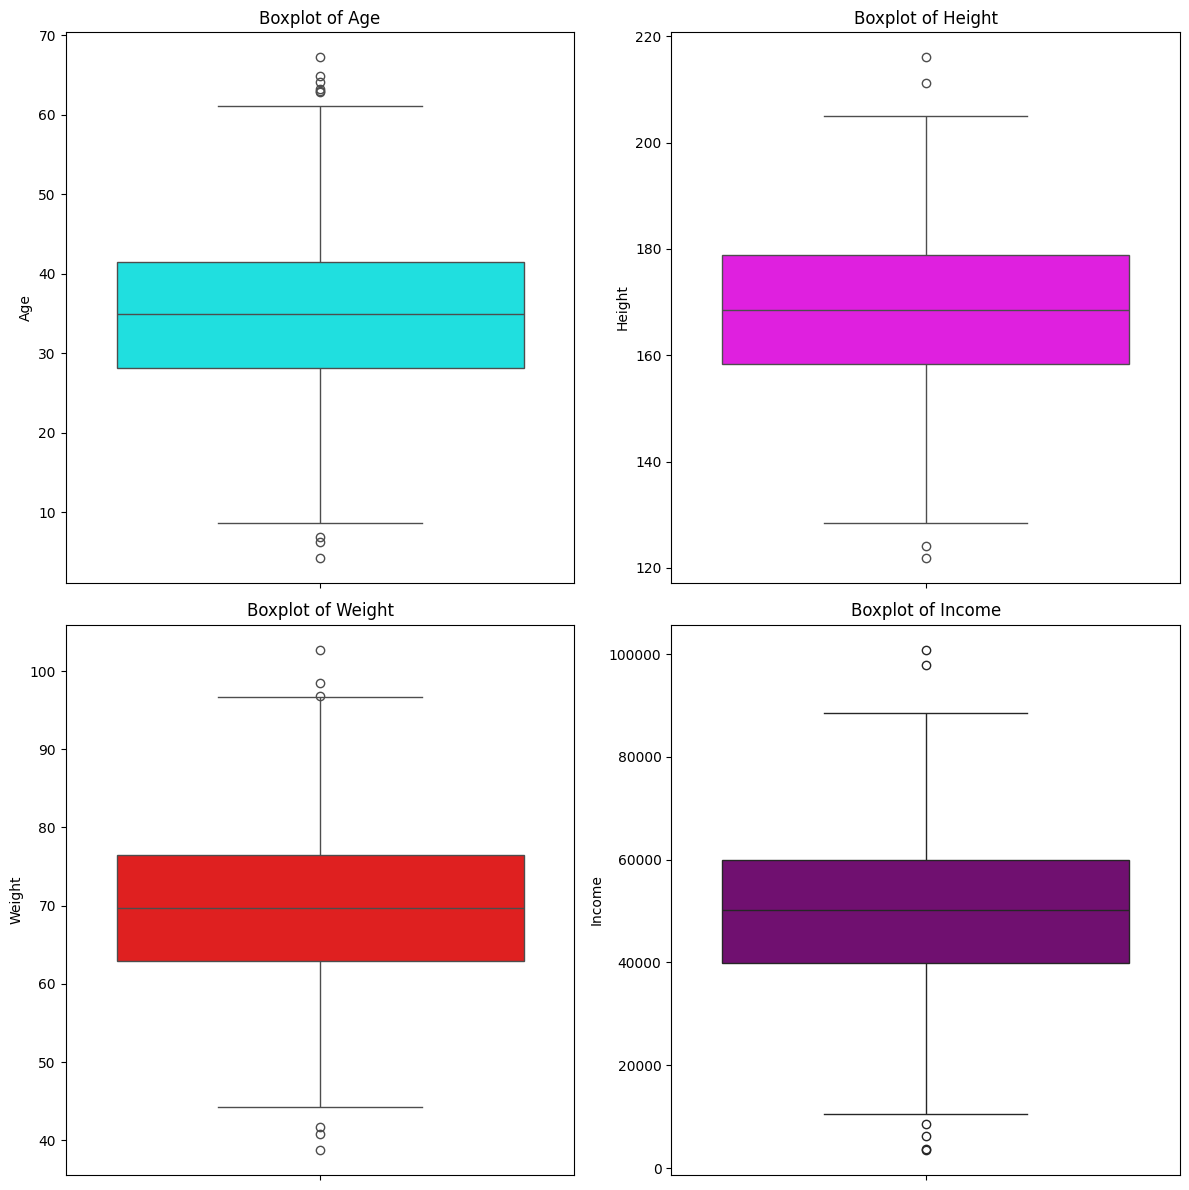

In [ ]:
'''
    Plot boxplots: age, height, weight, income
    Seaborn creates boxplots for:
    age, height, weight, income

    Syntax:
        fig, axs = plt.subplots(2, 2, figsize=(12, 12))
            - Set up the figure and axes for a 2x2 grid of plots
        sns.boxplot for plotting:
            - Individual plots placed in specific axes positions

'''

# set up the figure and axes for a 2x2 grid of plots for separate boxplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# boxplot for Age
sns.boxplot(data=dataset['Age'], ax=axs[0, 0], color='cyan')
axs[0, 0].set_title('Boxplot of Age')

# boxplot for Height
sns.boxplot(data=dataset['Height'], ax=axs[0, 1], color='magenta')
axs[0, 1].set_title('Boxplot of Height')

# boxplot for Weight
sns.boxplot(data=dataset['Weight'], ax=axs[1, 0], color='red')
axs[1, 0].set_title('Boxplot of Weight')

# boxplot for Income
sns.boxplot(data=dataset['Income'], ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Boxplot of Income')

# adjust layout
plt.tight_layout()
plt.show()



## Task 4: Correlation Analysis
#### Objective A: Calculate correlation

In [ ]:
'''
    Pearson correlation coefficient between:
    age, height, weight, income

'''
correlation_matrix = dataset[['Age', 'Height', 'Weight', 'Income']].corr()
correlation_matrix

,Age,Height,Weight,Income
Age,1.000000,0.018608,0.049256,0.048549
Height,0.018608,1.000000,-0.023638,0.042926
Weight,0.049256,-0.023638,1.000000,0.055189
Income,0.048549,0.042926,0.055189,1.000000


#### Objective B: Visualise the correlation matrix


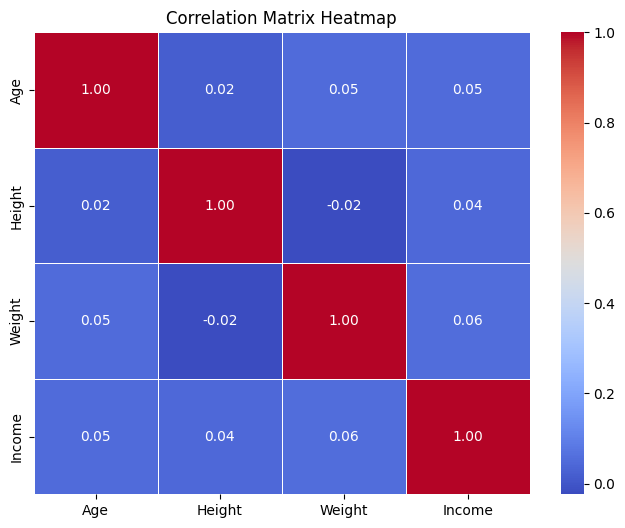

In [ ]:
'''
    Plot heatmap: correlation matrix of age, height, weight, income
    Seaborn creates heatmap with annotations:
    age, height, weight, income

    Syntax:
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

'''
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Task 5: Inferential statistics
#### Objective A: Hypothesis Testing


In [ ]:
'''
    Perform t-tests: age, height, weight, income
    Splits dataset into two groups and performs independent t-tests for:
    age, height, weight, income

    Syntax:
        ttest_ind(group1['Attribute'], group2['Attribute'])
            - Compares means between two groups for specified attributes

'''

# splitting the dataset
group1 = dataset.iloc[:500]
group2 = dataset.iloc[500:]

# performing t-tests for Age, Height, Weight, and Income
t_test_age = ttest_ind(group1['Age'], group2['Age'])
t_test_height = ttest_ind(group1['Height'], group2['Height'])
t_test_weight = ttest_ind(group1['Weight'], group2['Weight'])
t_test_income = ttest_ind(group1['Income'], group2['Income'])

t_test_results = {
    'Age': t_test_age,
    'Height': t_test_height,
    'Weight': t_test_weight,
    'Income': t_test_income
}

t_test_results


{'Age': TtestResult(statistic=1.0935034144989266, pvalue=0.2744366971655033, df=998.0),
 'Height': TtestResult(statistic=-0.45567422626036724, pvalue=0.6487233845641911, df=998.0),
 'Weight': TtestResult(statistic=1.4597153058275745, pvalue=0.14468302361016747, df=998.0),
 'Income': TtestResult(statistic=0.8354168572733173, pvalue=0.4036829928246565, df=998.0)}